In [1]:
import pandas as pd

data = pd.read_csv("../datasets/market_insights_overview_all.csv")
data["date"] = pd.to_datetime(data["date"])
# data = pd.read_csv("../datasets/market_insights_overview_5p.csv")



In [2]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34033079 entries, 0 to 34033078
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   product_id       int64         
 2   manufacturer_id  int64         
 3   cat_id           int64         
 4   root_cat_id      int64         
 5   date             datetime64[ns]
 6   hits             int64         
 7   clicks           int64         
 8   last_modified    object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.3+ GB


In [3]:
categories = pd.read_csv("../datasets/solr_categories_all_16_09_2021.csv")
categories.head()

,parent,title_no,internal_doc_type,image_url,description,title,title_phonetic,url,tags,path,...,internal_doc_id,popularity,root,alias,title_edge_ngram,id,alias_no,adult,last_modified,parents
0,Sofa,2-seter sofa,category,/3135/3135859/jot_1603574-03_Fs.154x75!m.png,181 produkter,2-seter sofa,2-seter sofa,/kategorier/2-seter-sofa,filter,Hjem og husholdning>Møbler>Sofa>2-seter sofa,...,13084,1192,Hjem og husholdning,NaN,2-seter sofa,13084,NaN,False,2021-09-16T03:02:23.579Z,"Hjem og husholdning,Møbler,Sofa"
1,Sofa,3-seter sofa,category,/3135/3135481/jot_1514401-01_Fs.168x75!m.png,181 produkter,3-seter sofa,3-seter sofa,/kategorier/3-seter-sofa,filter,Hjem og husholdning>Møbler>Sofa>3-seter sofa,...,13085,1192,Hjem og husholdning,NaN,3-seter sofa,13085,NaN,False,2021-09-16T03:02:23.579Z,"Hjem og husholdning,Møbler,Sofa"
2,Foto og video,360-kamera,category,/2529/2529818/original.98x75!m.jpg,19 produkter,360-kamera,360-kamera,/kategorier/360-kamera,products,Foto og video>360-kamera,...,11874,1406,Foto og video,"360-graderskamera,vr-kamera",360-kamera,11874,"360-graderskamera,vr-kamera",False,2021-09-16T03:02:23.579Z,Foto og video
3,TV og hjemmekino,3D-briller,category,/1335/1335677/3d-briller.148x75!m.jpg,6 produkter,3D-briller,3D-briller,/kategorier/3d-briller,products,Lyd og bilde>TV og hjemmekino>3D-briller,...,11030,1007,Lyd og bilde,NaN,3D-briller,11030,NaN,False,2021-09-16T03:02:23.579Z,"Lyd og bilde,TV og hjemmekino"
4,"Skriver, skanner og tilbehør",3D-printer,category,/1194/1194469/bfb-3dtouch-smoke-3d-printer_0.6...,57 produkter,3D-printer,3D-printer,/kategorier/3d-printer,products,"Data>Skriver, skanner og tilbehør>3D-printer",...,11091,1729,Data,"3d printere,3d-skriver,printer,skriver,skrivere",3D-printer,11091,"3d printere,printer,skriver,skrivere,3d-skriver",False,2021-09-16T03:02:23.579Z,"Data,Skriver\, skanner og tilbehør"


In [4]:
# Join market_insight table with category names
category_names = categories[[ "internal_doc_id", "title"]]
category_id_to_names_map = dict(map(lambda x: (x["internal_doc_id"], x["title"]), category_names.to_dict("records")))
category_name_to_id_map = dict(map(lambda x: (x["title"], x["internal_doc_id"]), category_names.to_dict("records")))

In [5]:
#print(category_names["title"])
#categories_file = open("categories.txt", "w")
#for cat_line in category_names["title"]:
#    categories_file.write(cat_line)
#    categories_file.write("\n")
#categories_file.close()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Set pandas to use decimal insteaf of scientific e^x notaion
pd.set_option("display.float_format", lambda x: "%.0f" % x)

interesting_data = data[["date", "hits", "clicks", "product_id", "cat_id"]]

print(f"Unique products: {data['product_id'].nunique()}")
print(f"Unique categories: {data['cat_id'].nunique()}")


grouped = interesting_data.groupby(["cat_id", "date"], as_index=False).sum()
# Filter away early 2018 data as it seems to contain errors
grouped = grouped.loc[grouped['date'] > '2018-12-01']

print(grouped)
grouped.describe()

Unique products: 302636
Unique categories: 1320
         cat_id       date  hits  clicks  product_id
120           2 2018-12-02  2450     301   293349707
121           2 2018-12-03  2889     418   324468137
122           2 2018-12-04  3048     413   319458697
123           2 2018-12-05  2777     381   305158187
124           2 2018-12-06  2882     363   292147192
...         ...        ...   ...     ...         ...
1011335   13759 2021-09-15     3       0      987105
1011336   13764 2021-09-10    20      30    11260516
1011337   13764 2021-09-12     7       4     2094121
1011338   13764 2021-09-13     7       2     2489036
1011339   13764 2021-09-15     7       0     3141188

[939383 rows x 5 columns]


,cat_id,hits,clicks,product_id
count,939383,939383,939383,939383
mean,10404,131,33,11505893
std,3880,427,132,24523177
min,2,0,0,8791
25%,11201,9,2,1894146
50%,11645,30,7,4721243
75%,12071,97,24,11235958
max,13764,60601,53187,1514347598


In [7]:
# Join with category names
grouped_joined= pd.merge(grouped, category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
grouped_joined.rename(columns={"title": "cat_name"}, inplace=True)
grouped_joined

,cat_id,date,hits,clicks,product_id,internal_doc_id,cat_name
0,2,2018-12-02,2450,301,293349707,2,Bærbar PC
1,2,2018-12-03,2889,418,324468137,2,Bærbar PC
2,2,2018-12-04,3048,413,319458697,2,Bærbar PC
3,2,2018-12-05,2777,381,305158187,2,Bærbar PC
4,2,2018-12-06,2882,363,292147192,2,Bærbar PC
...,...,...,...,...,...,...,...
939378,13759,2021-09-15,3,0,987105,13759,Toalettpapir
939379,13764,2021-09-10,20,30,11260516,13764,Skytestokk
939380,13764,2021-09-12,7,4,2094121,13764,Skytestokk
939381,13764,2021-09-13,7,2,2489036,13764,Skytestokk


I perioden august 2018 til perioden august 2021 ble det registrert 1320 unike kategorier.
Et nevralnett med 1320 i bredde er litt stort kanskje? Det vil også låse modellen til X antall kategorier.
Dette er et argument for å se på hver kategori inviduelt og ha en egen modell per kategori.

Ulempen med det igjen er at det blir veldig mange modeller...

cat_id        38518
date          38518
hits          38518
clicks        38518
product_id    38518
dtype: int64


array([[<AxesSubplot:title={'center':'hits'}>,
        <AxesSubplot:title={'center':'clicks'}>]], dtype=object)

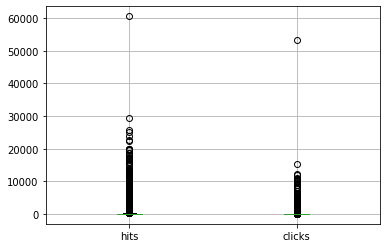

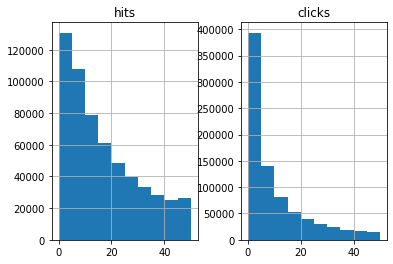

In [8]:
print(grouped[grouped["hits"] == 1].count())
grouped.boxplot(column=["hits", "clicks"])
grouped.hist(column=["hits", "clicks"], range=(0, 50))

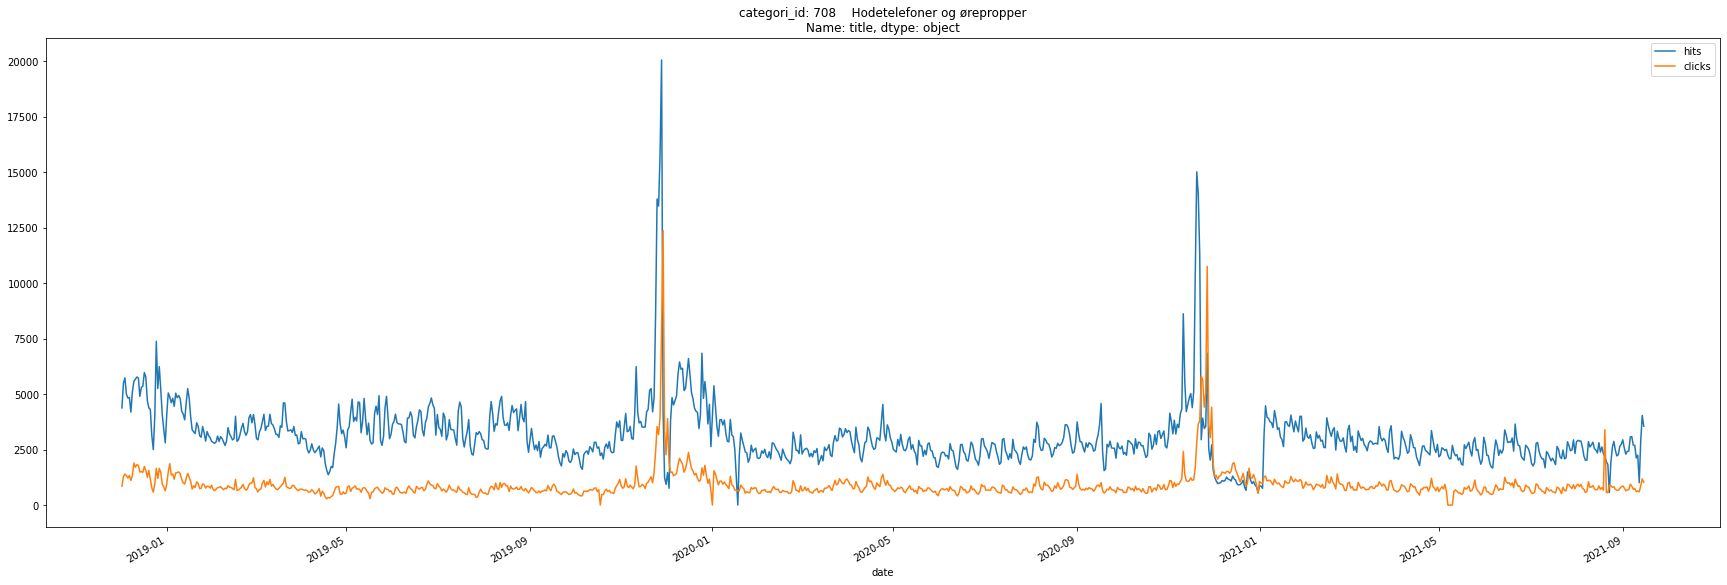

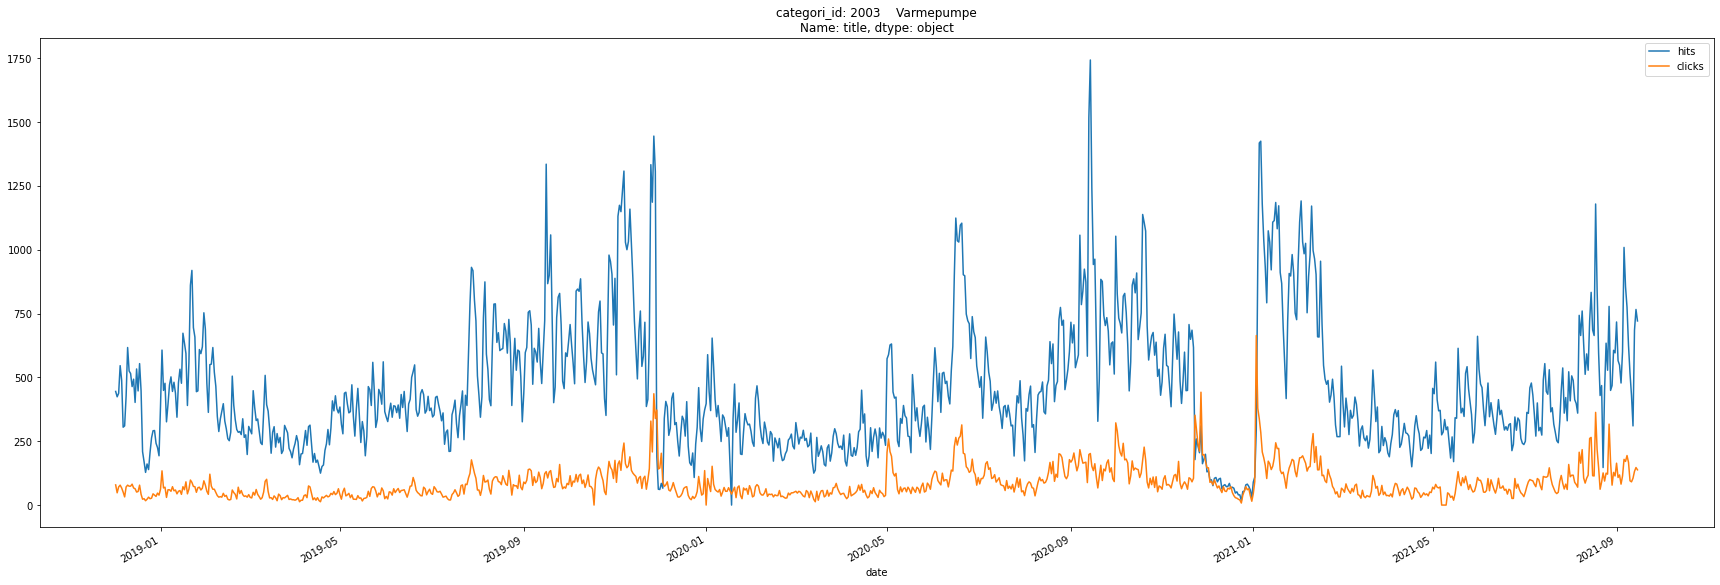

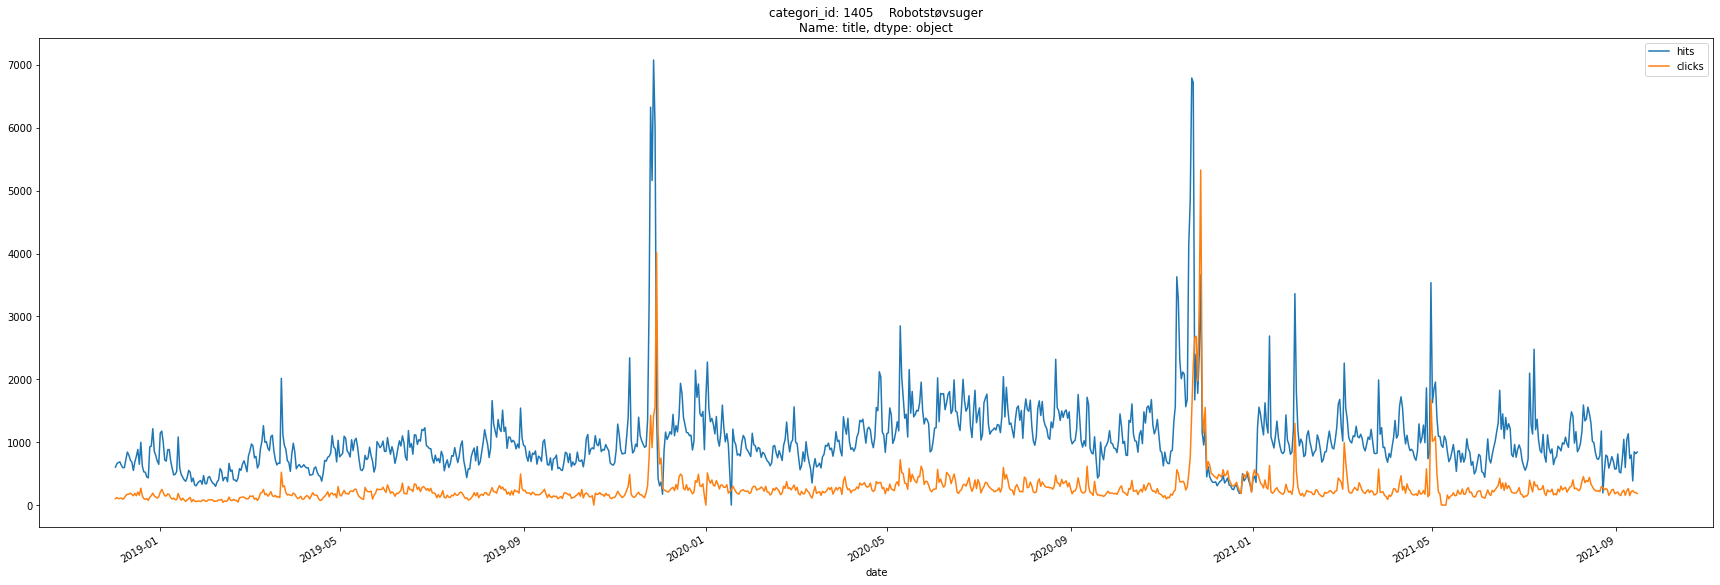

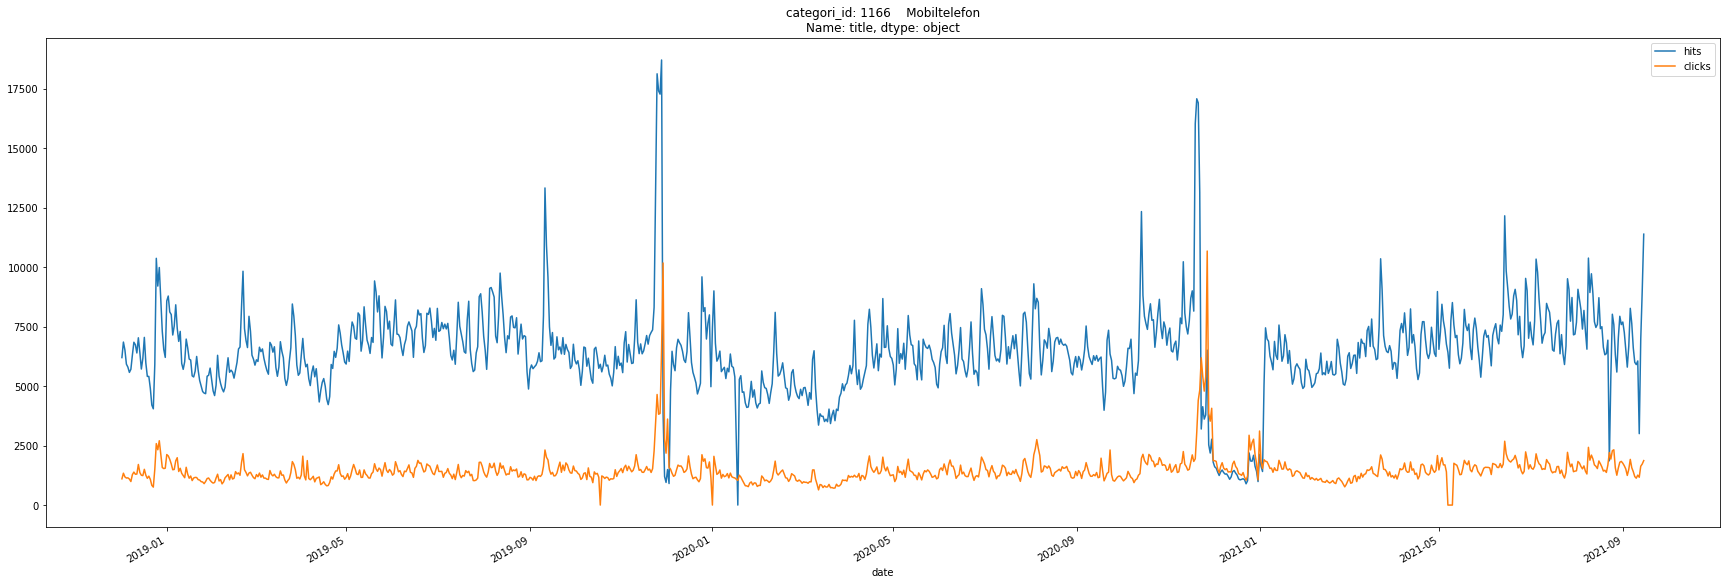

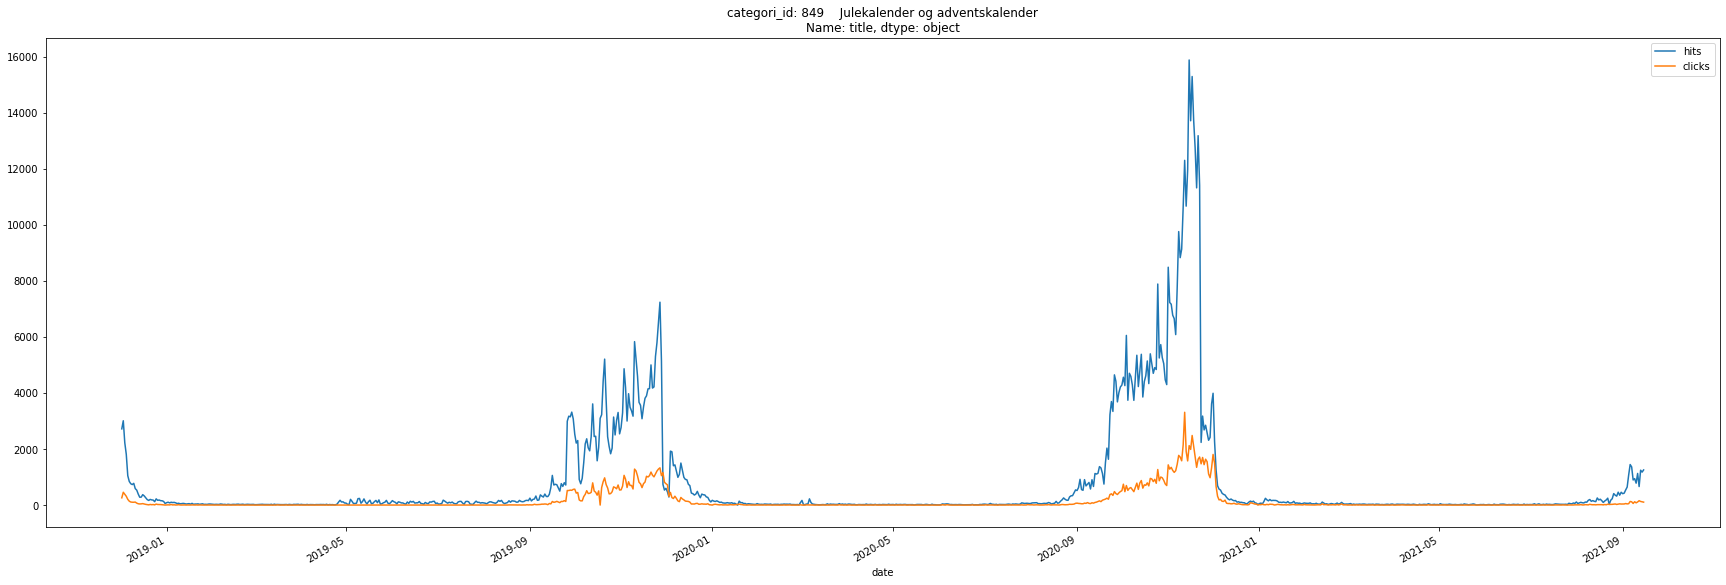

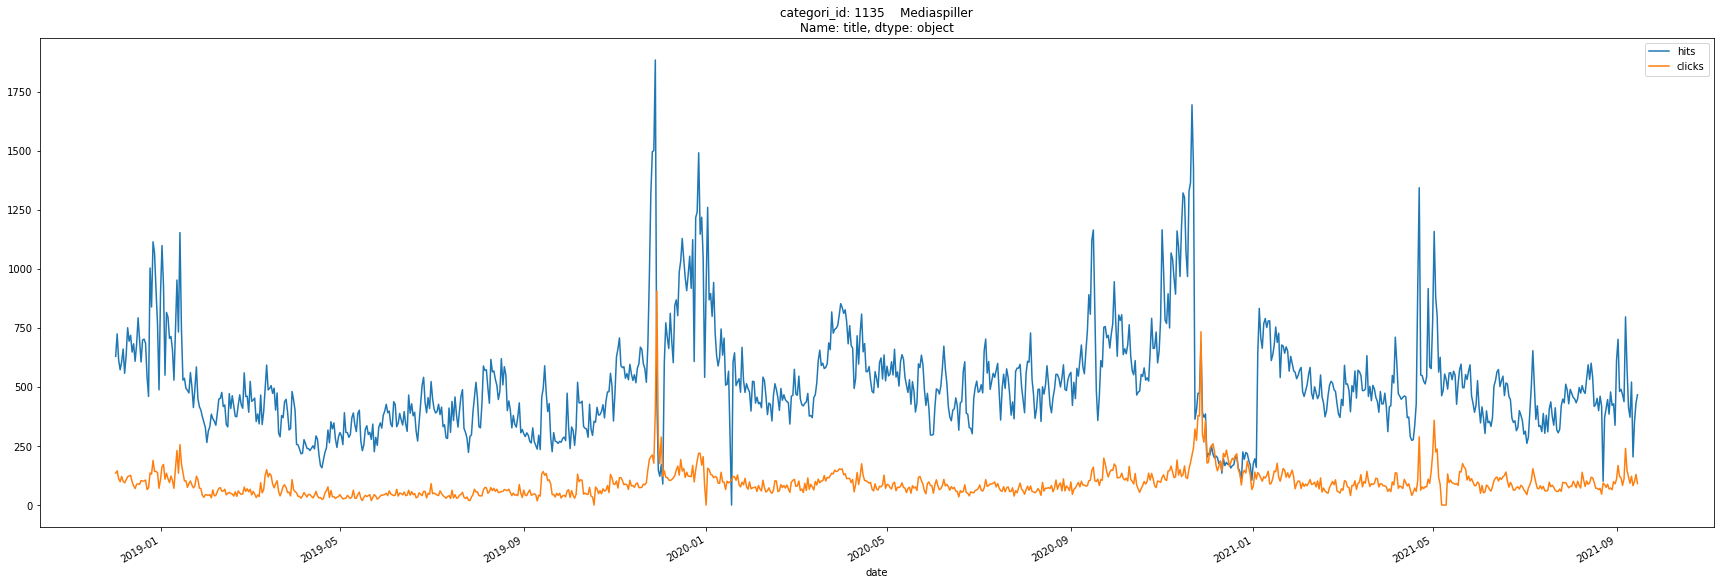

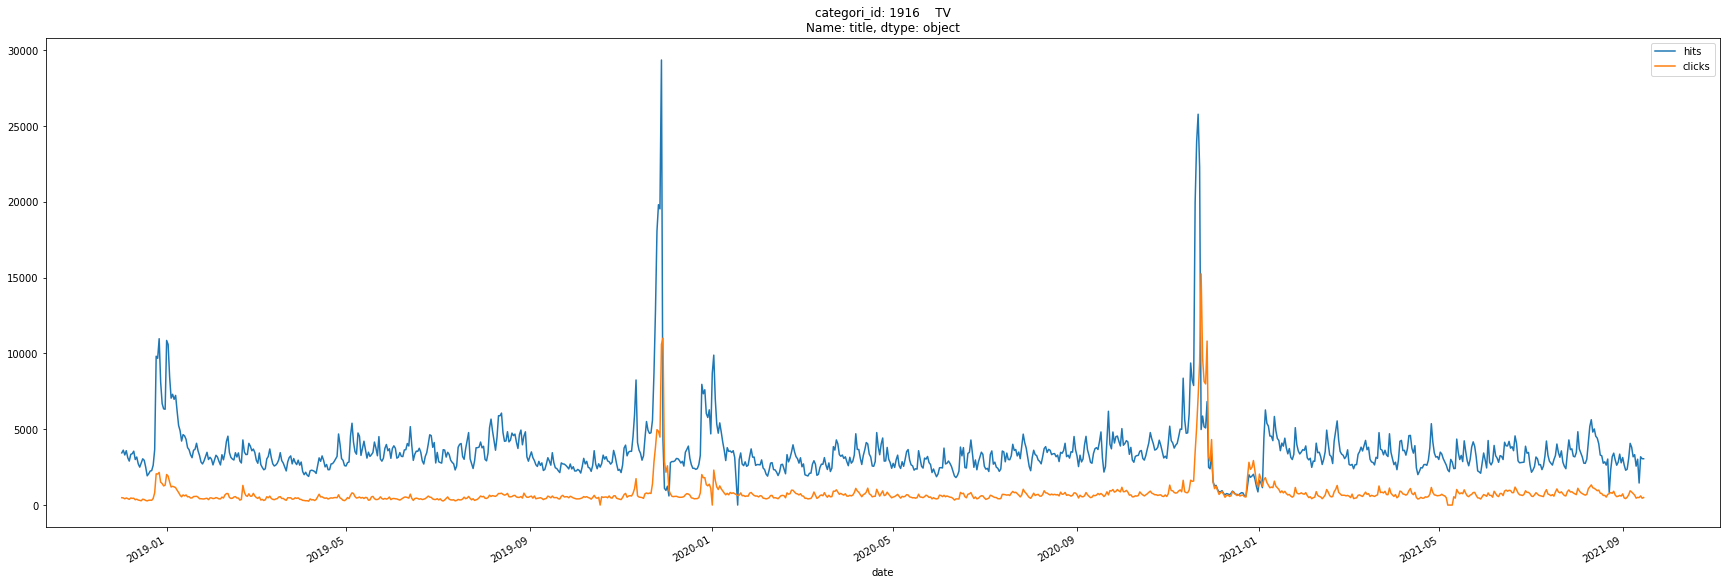

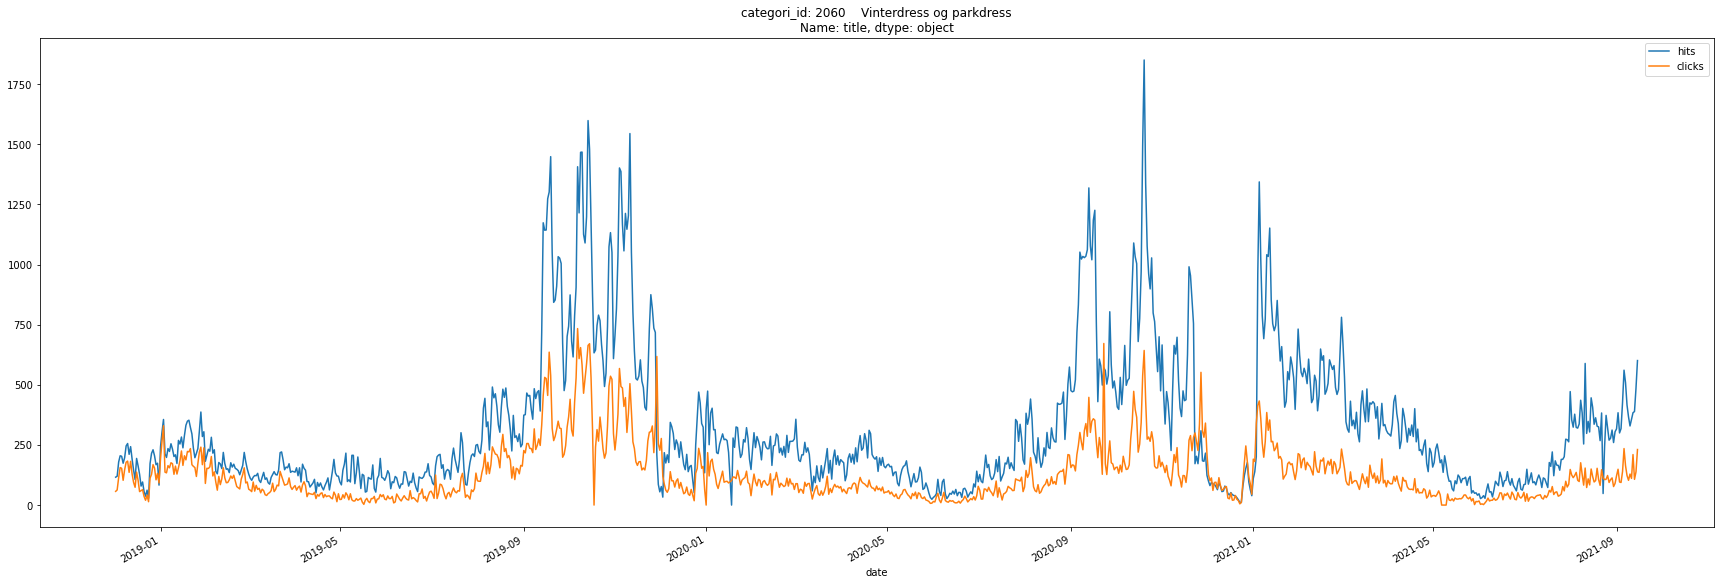

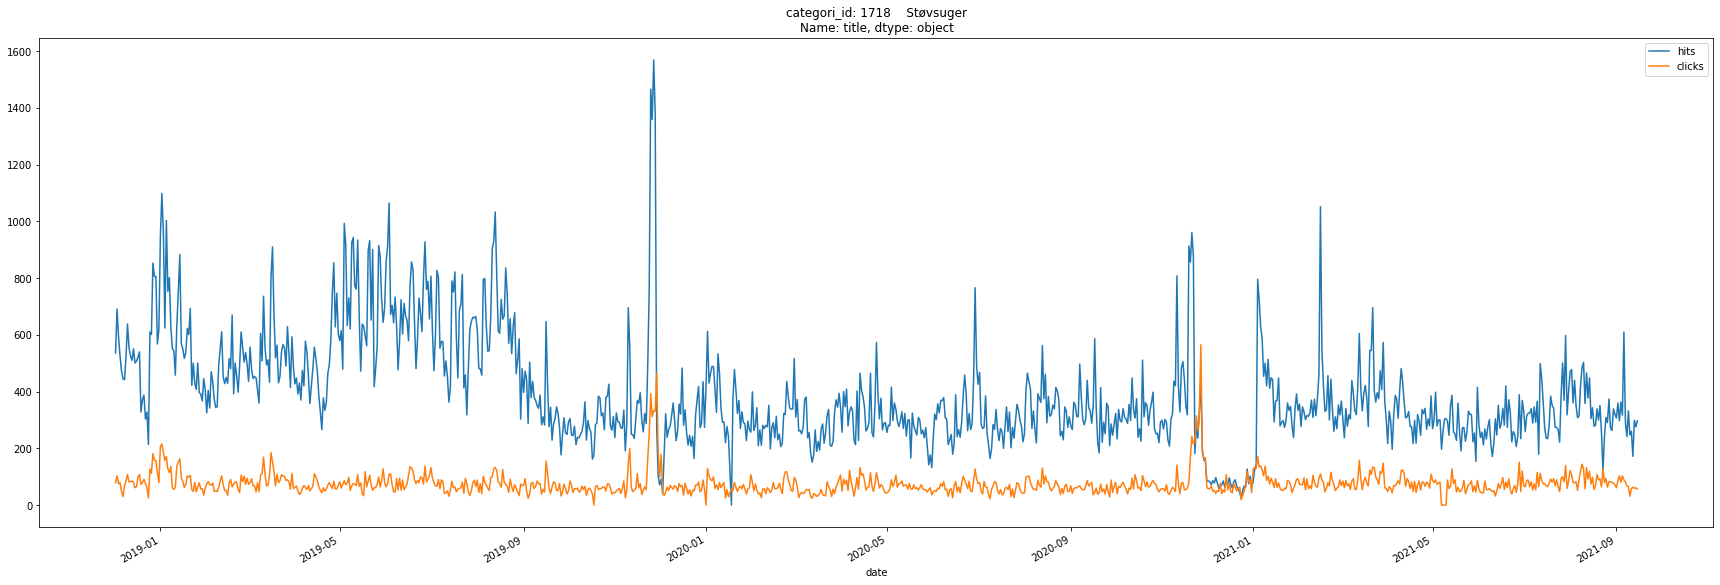

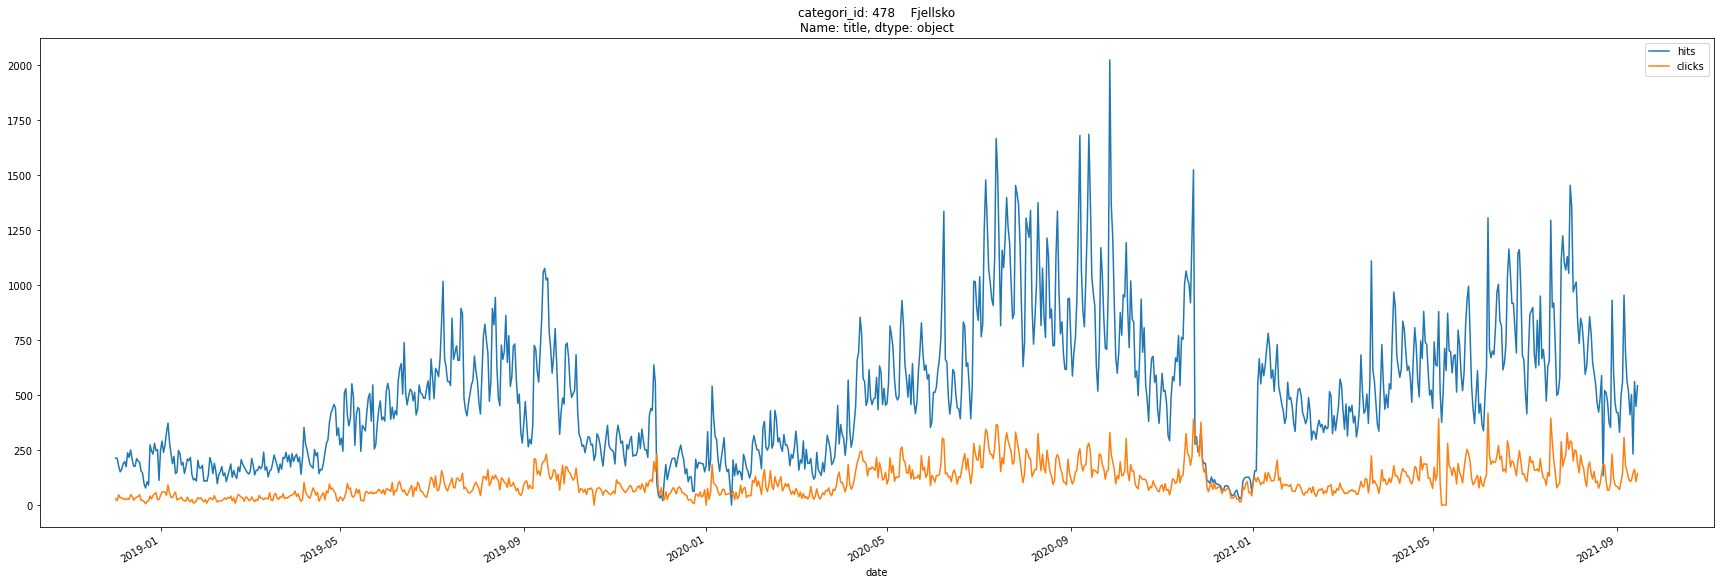

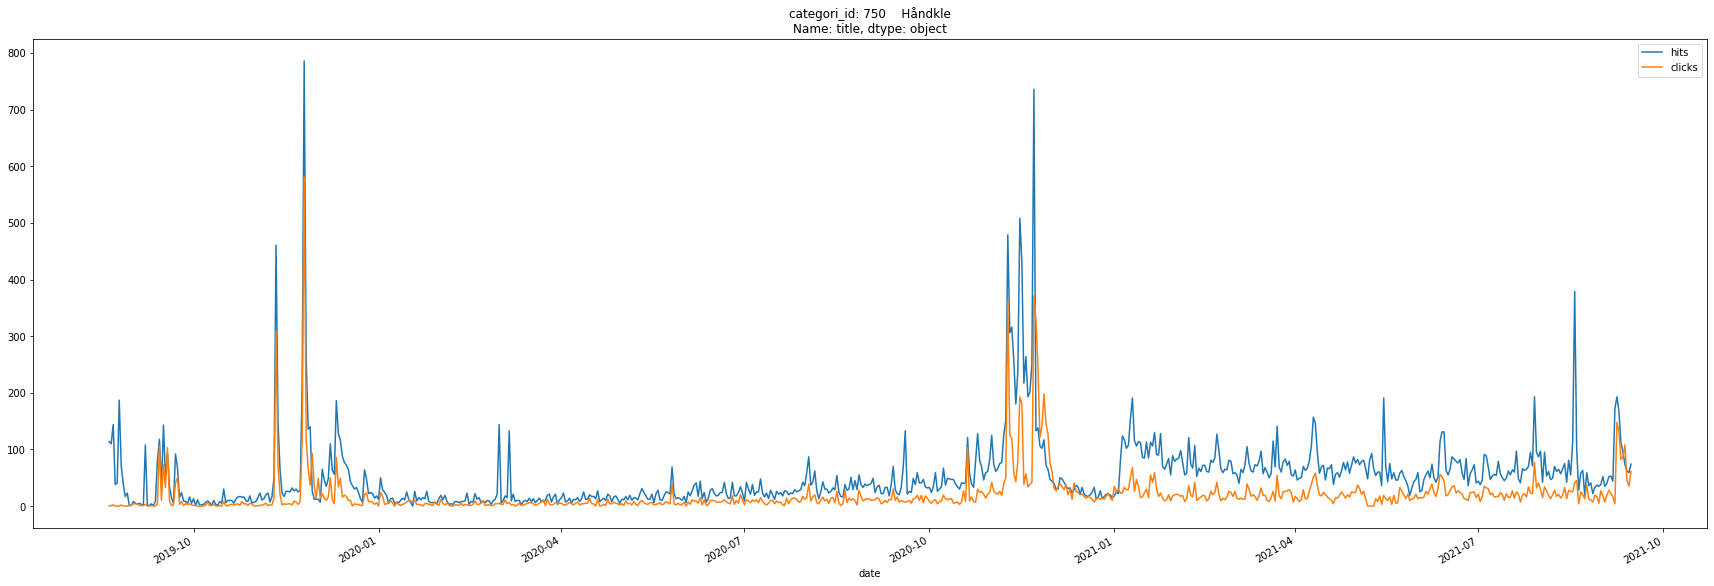

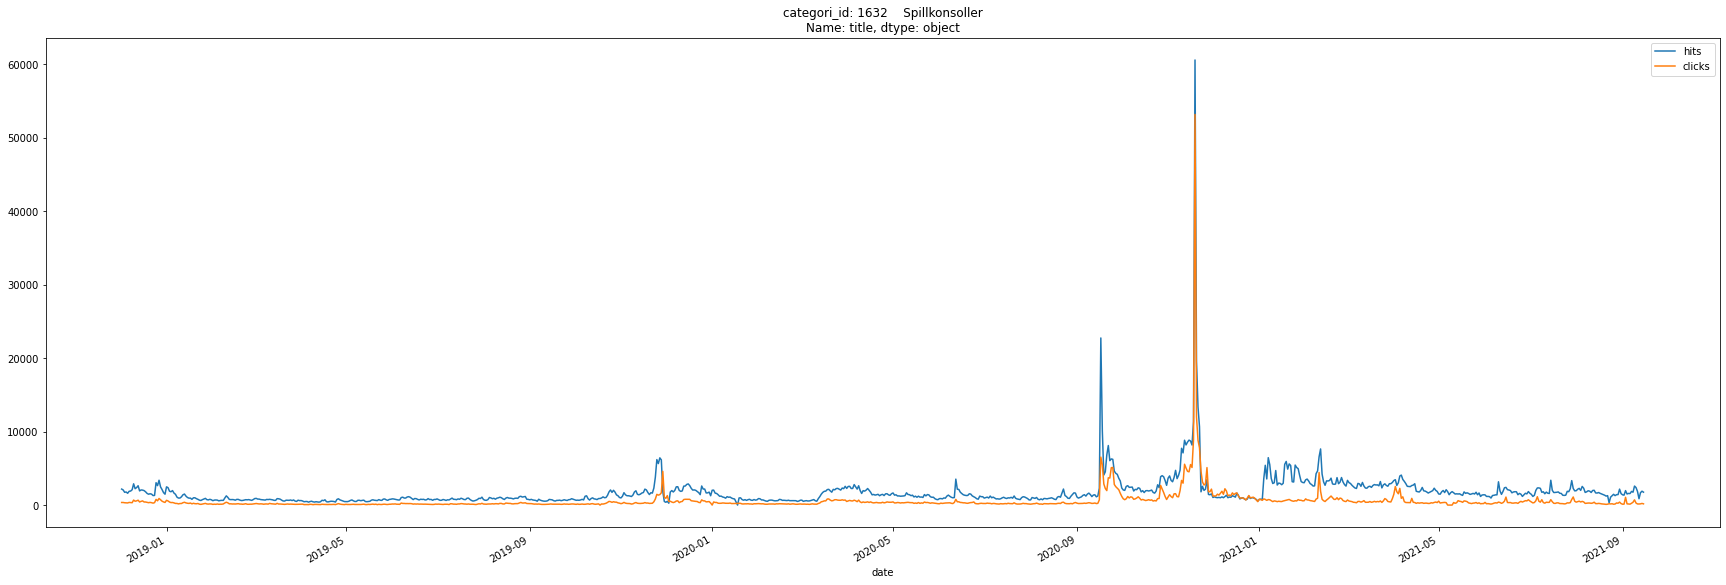

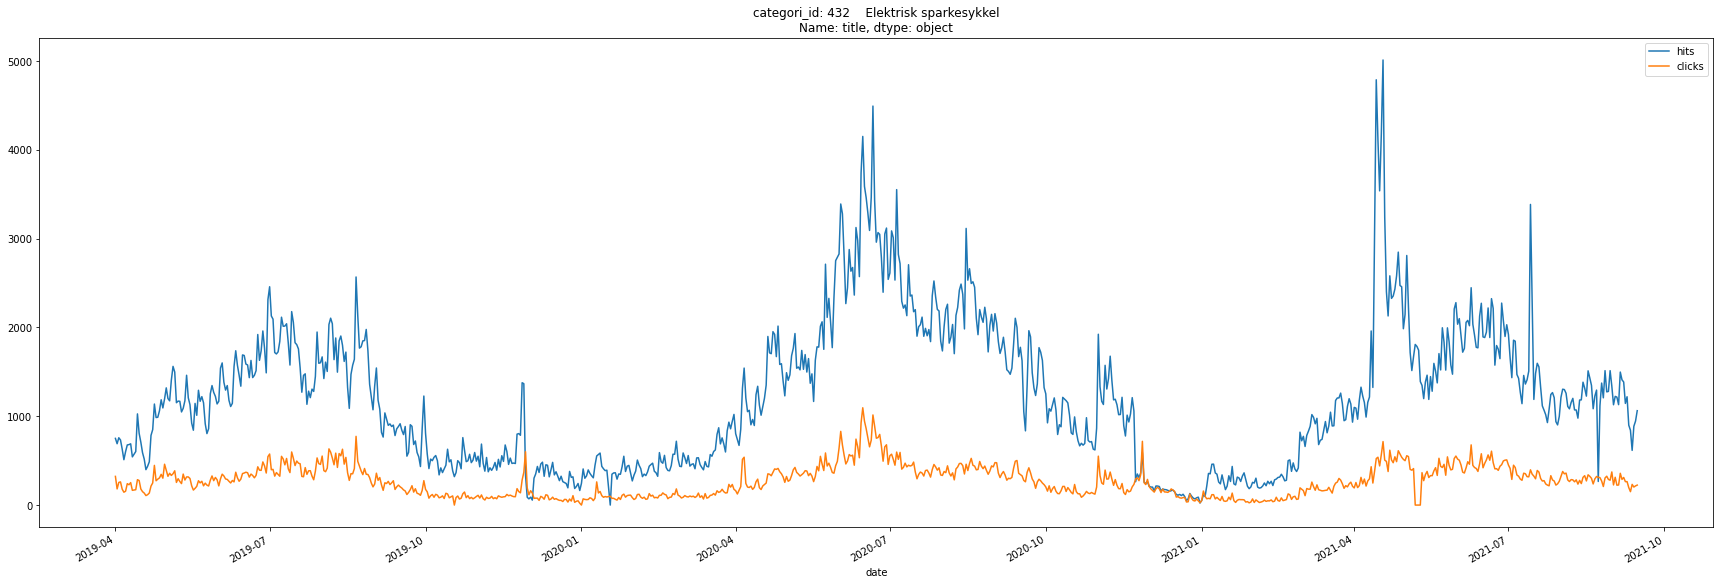

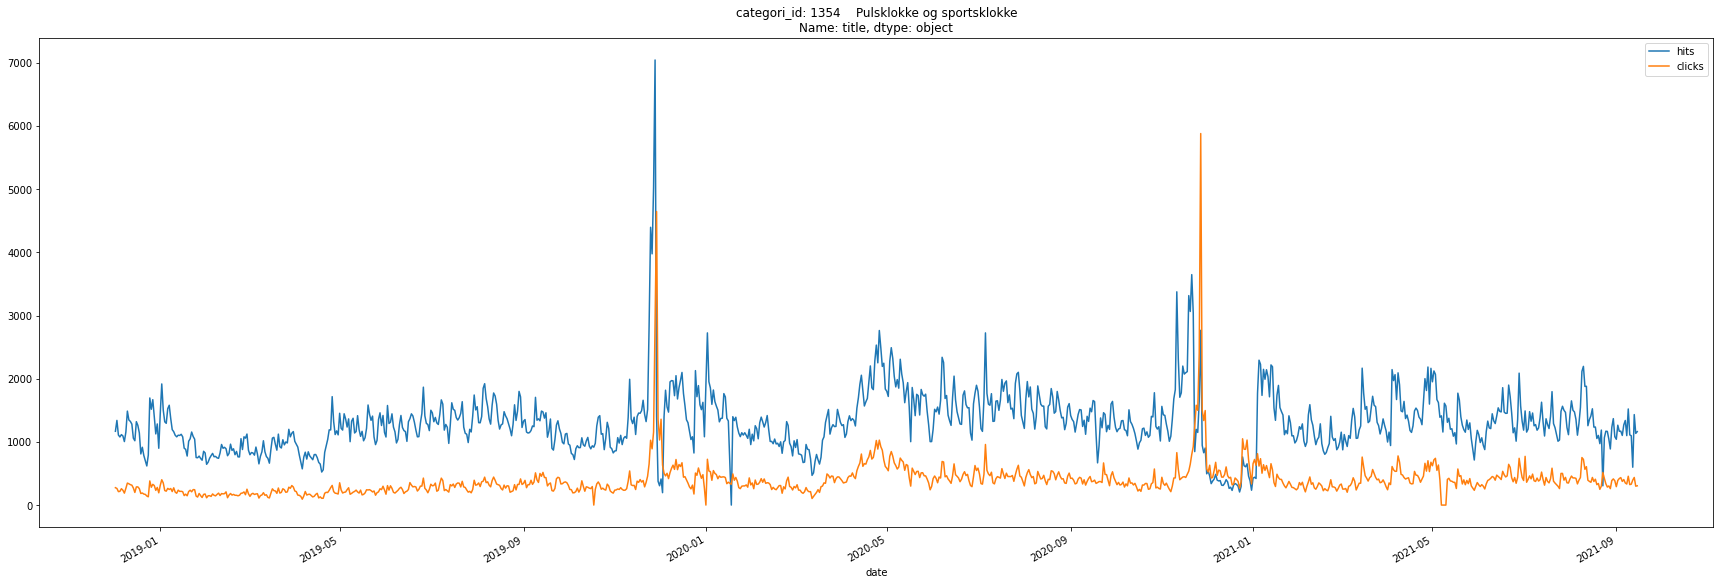

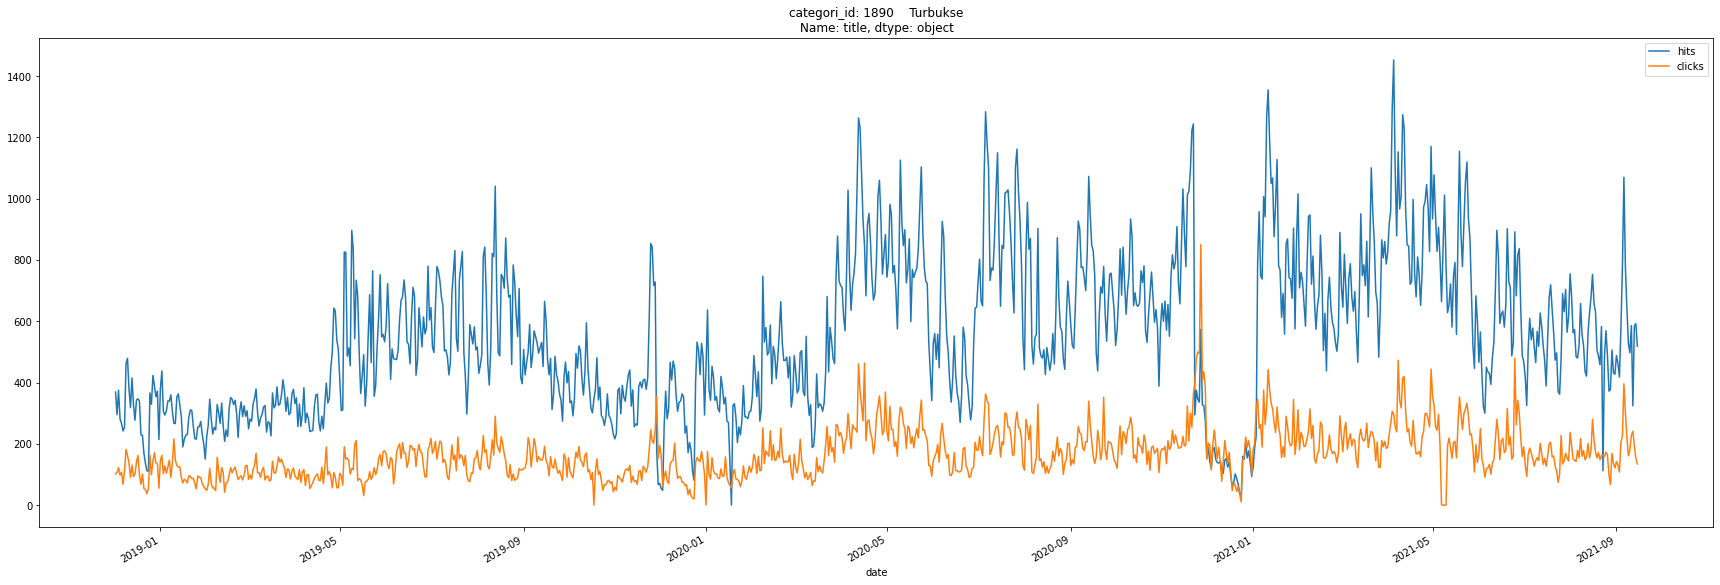

In [9]:
import matplotlib.dates as mdate
date_locator = mdate.MonthLocator()
formatter = mdate.DateFormatter("%Y-%m")
all_categories = data["cat_id"].unique()
for cat in all_categories[:15]:
    cat_name = categories.loc[categories["internal_doc_id"] == cat]["title"]
    grouped[grouped["cat_id"] == cat].plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori_id: {cat_name}", 
        figsize=(30, 10),
        )#.xaxis.set_major_locator(date_locator)
#grouped.plot(x="date", y=["hits", "clicks"],)
#interesting_data.plot()

<AxesSubplot:title={'center':'categori: Turmat'}, xlabel='date'>

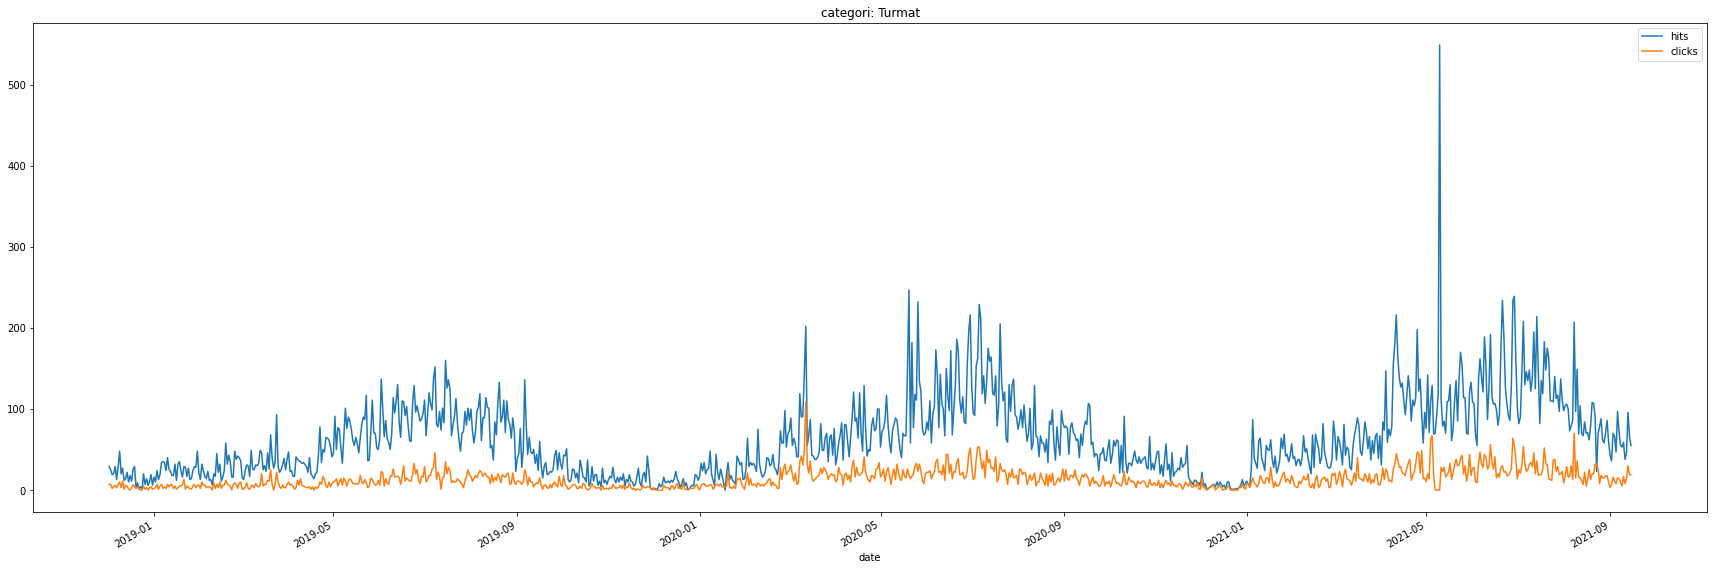

In [10]:
turmat = grouped[grouped["cat_id"] == 11488]
turmat.head()
name = categories.loc[categories["internal_doc_id"] == 11488]
name.head()
turmat.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Turmat", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Våpenskap'}, xlabel='date'>

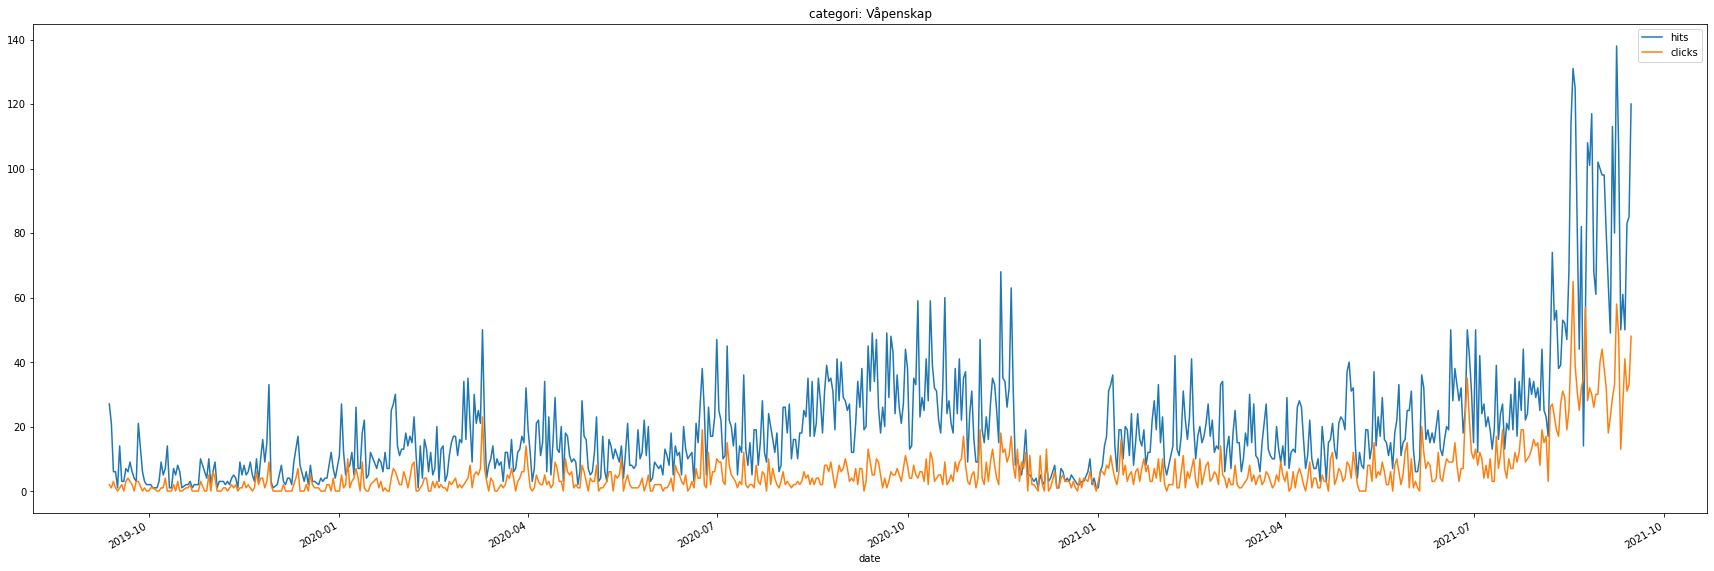

In [11]:
vapenskap = grouped[grouped["cat_id"] == 12738]
vapenskap.head()
name = categories.loc[categories["internal_doc_id"] == 12738]
name.head()
vapenskap.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Våpenskap", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Kopp og krus'}, xlabel='date'>

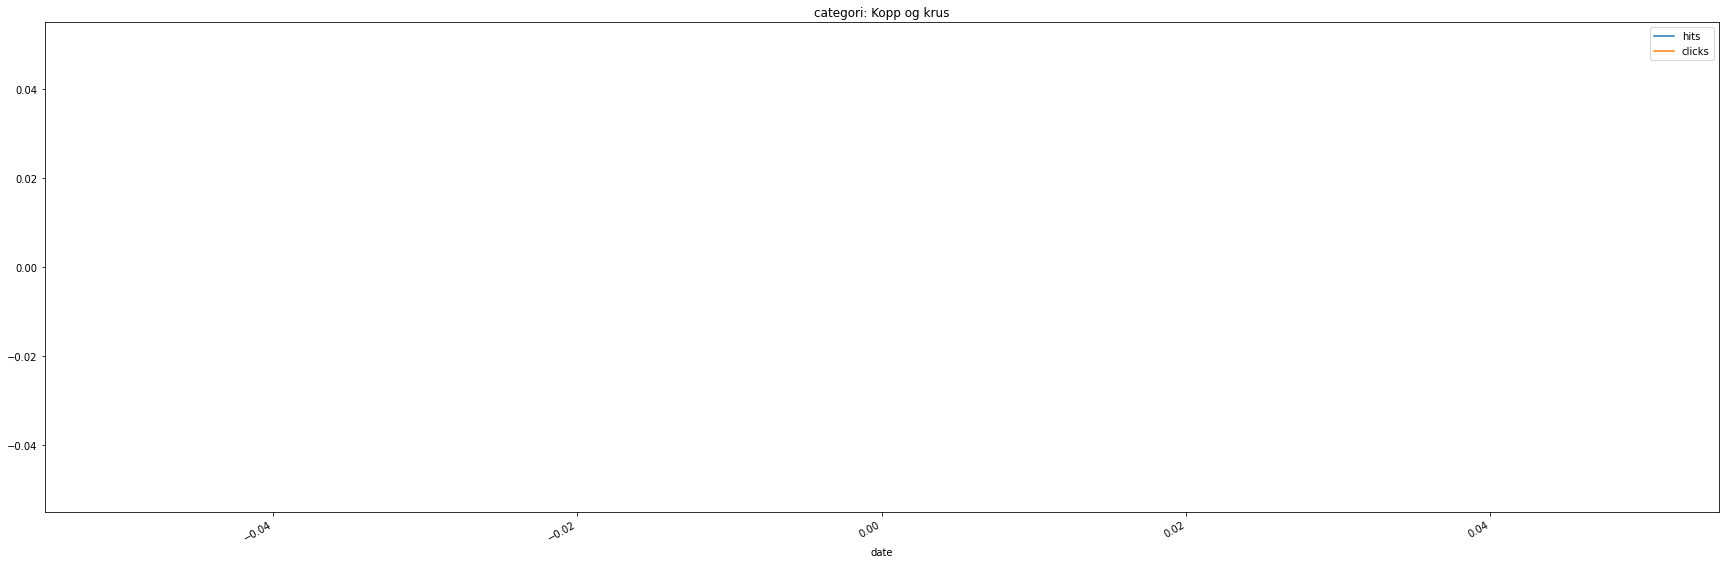

In [12]:
kopp_og_krus = grouped[grouped["cat_id"] == 12663]
kopp_og_krus.head()
name = categories.loc[categories["internal_doc_id"] == 12663]
name.head()
kopp_og_krus.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Kopp og krus", 
        figsize=(30, 10),)


Det virker ikke som om det er data på kopper og krus. Dette burde undersøkes nærmere. Forhåpentligvis finnes dataen, men den er ikke hentet ut og sendt til oss.

<AxesSubplot:title={'center':'categori: Hengekøye'}, xlabel='date'>

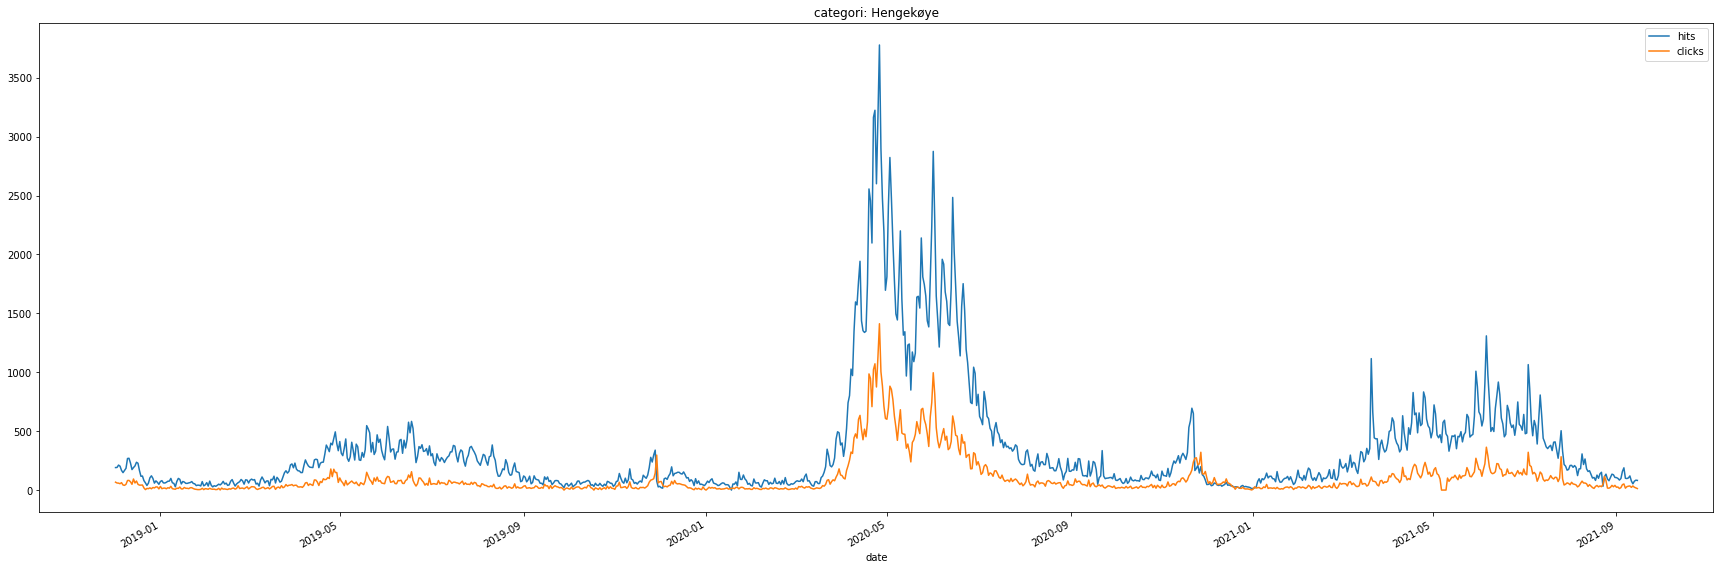

In [13]:
hengekøye = grouped[grouped["cat_id"] == 11514]
hengekøye.head()
name = categories.loc[categories["internal_doc_id"] == 11514]
name.head()
hengekøye.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Hengekøye", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Grafikkort (GPU)'}, xlabel='date'>

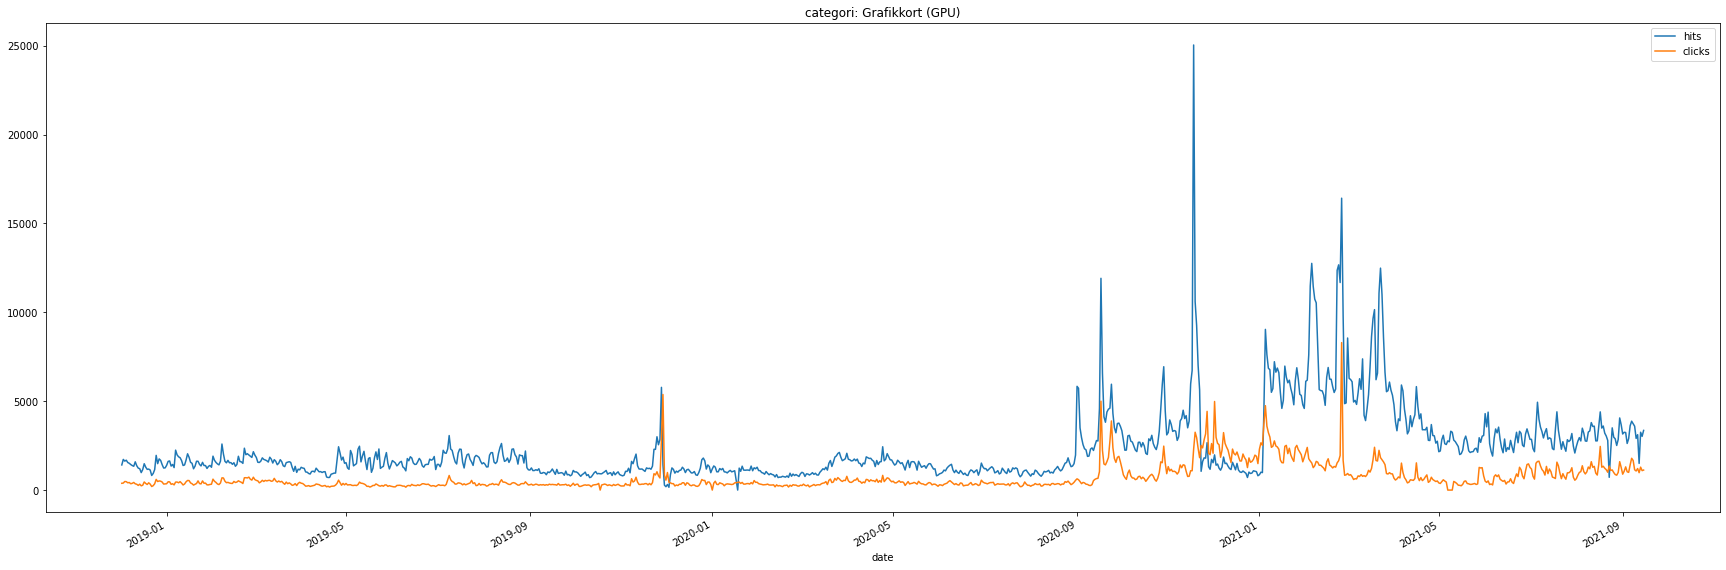

In [27]:
gpu = grouped[grouped["cat_id"] == 30]
gpu.head()
name = categories.loc[categories["internal_doc_id"] == 30]
name.head()
gpu.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: {category_id_to_names_map[30]}", 
        figsize=(30, 10),)

[[1.         0.57495665]
 [0.57495665 1.        ]]


<AxesSubplot:>

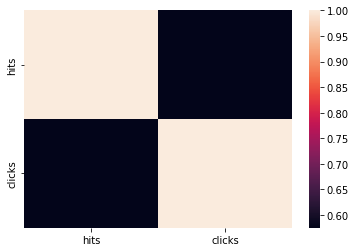

In [15]:
import numpy as np
name.head()
import seaborn as sns
print(np.corrcoef(data["hits"], data["clicks"]))
correlation_matrix = data[["hits", "clicks"]].corr()
sns.heatmap(correlation_matrix)

Høy korrelasjon mellom hits og klicks!

In [16]:
data.describe()

,id,product_id,manufacturer_id,cat_id,root_cat_id,hits,clicks
count,34033079,34033079,34033079,34033079,34033079,34033079,34033079
mean,18206726,328589,6076,8204,7866,4,1
std,10006263,83184,4987,5170,5174,21,10
min,278160,2682,0,2,101,0,0
25%,9648576,270226,1191,248,128,1,0
50%,18223518,330599,5652,11251,11390,1,0
75%,26878848,388133,9650,11633,11747,3,1
max,35480822,524316,20879,13764,12254,38420,37621


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34033079 entries, 0 to 34033078
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   product_id       int64         
 2   manufacturer_id  int64         
 3   cat_id           int64         
 4   root_cat_id      int64         
 5   date             datetime64[ns]
 6   hits             int64         
 7   clicks           int64         
 8   last_modified    object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.3+ GB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'product_id'}>,
        <AxesSubplot:title={'center':'manufacturer_id'}>],
       [<AxesSubplot:title={'center':'cat_id'}>,
        <AxesSubplot:title={'center':'root_cat_id'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'hits'}>,
        <AxesSubplot:title={'center':'clicks'}>, <AxesSubplot:>]],
      dtype=object)

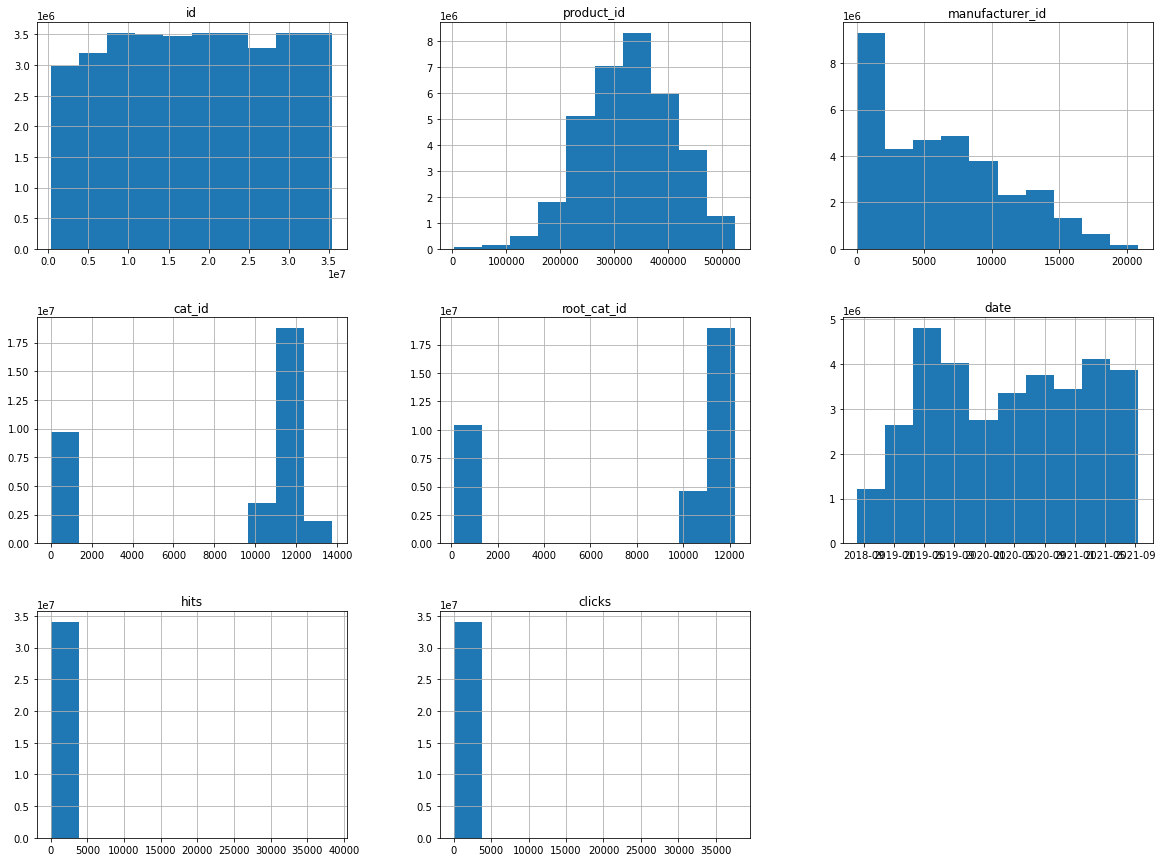

In [18]:
data.hist(figsize=(20,15))

In [19]:

# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix)
data_by_cat_id = grouped.pivot(index=["date"], columns=["cat_id"])["hits"]
data_by_cat_id.tail()

cat_id,2,5,6,9,10,11,13,14,15,16,...,13741,13742,13743,13746,13747,13748,13751,13758,13759,13764
date,,,,,,,,,,,,,,,,,,,,,
2021-09-11,1744,408,136,827,344,62,244,2,1,17,...,7,552,16,16,1,7,3,3,6,NaN
2021-09-12,924,219,74,478,214,36,177,1,3,12,...,3,247,4,NaN,1,2,3,NaN,0,7
2021-09-13,2179,469,140,833,308,96,198,1,2,48,...,21,658,6,16,8,3,4,7,11,7
2021-09-14,2078,469,148,971,411,66,308,1,1,24,...,9,349,5,8,3,4,NaN,4,8,NaN
2021-09-15,1894,487,138,1108,314,59,243,3,2,14,...,3,303,8,11,6,10,0,3,3,7


In [20]:
# Check the validity of the pivot table
grouped_joined[(grouped_joined['date'] == '2021-09-12') & (grouped_joined['cat_id'] == 13759)]
# Seems to check out

,cat_id,date,hits,clicks,product_id,internal_doc_id,cat_name
939375,13759,2021-09-12,0,1,522293,13759,Toalettpapir


cat_id,2,5,6,9,10,11,13,14,15,16,...,13741,13742,13743,13746,13747,13748,13751,13758,13759,13764
cat_id,,,,,,,,,,,,,,,,,,,,,
2,1,0,1,1,1,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1,0,1,1,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,1,0,1,1,0,0,0,-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,1,0,1,1,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,1,1,1,1,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


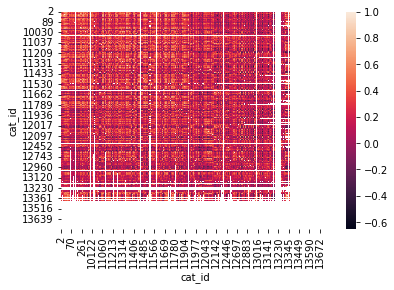

In [21]:
import seaborn as sns
# Require at least 200 observations for correlation to be valid
category_correlation = data_by_cat_id.corr(min_periods=300)
#plt.figure(figsize=(40,35))
sns.heatmap(category_correlation)
category_correlation

In [22]:
category_correlation.to_csv("../datasets/category_correlation.csv")

In [23]:
# Find number of correlations with bærbar-pc som ikke er 0 eller 1
pc_correlations = category_correlation[2].dropna()
print("Number of correlations with bærbar pc which is not 0 or 1: ",
  len(
  list(
    filter(lambda x: x != 0 and x != 1, 
       pc_correlations
      )
  )
))
print("Number of correlations with bærbar pc which is 1: ",list(filter(lambda x: x == 1, pc_correlations)))

Number of correlations with bærbar pc which is not 0 or 1:  1064
Number of correlations with bærbar pc which is 1:  [1.0]


In [24]:
cpu_id = category_name_to_id_map['Prosessor (CPU)']
gpu_id = category_name_to_id_map['Grafikkort (GPU)']
cpu_gpu_correlation = data_by_cat_id.loc[:, [cpu_id, gpu_id]].corr()
print(cpu_gpu_correlation)
data_by_cat_id.loc[:, [cpu_id, gpu_id]]

cat_id  5   30
cat_id        
5        1   0
30       0   1


cat_id,5,30
date,,
2018-12-02,855,1414
2018-12-03,807,1726
2018-12-04,795,1629
2018-12-05,831,1681
2018-12-06,710,1550
...,...,...
2021-09-11,408,3115
2021-09-12,219,1501
2021-09-13,469,3253


Ser ikke ut som CPU eller GPU korrelerer i det hele tatt

Digitalkamera
Bærbar PC
cat_id  2  6
cat_id      
2       1  1
6       1  1


cat_id,2,6
date,,
2018-12-02,2450,417
2018-12-03,2889,432
2018-12-04,3048,483
2018-12-05,2777,391
2018-12-06,2882,372
...,...,...
2021-09-11,1744,136
2021-09-12,924,74
2021-09-13,2179,140


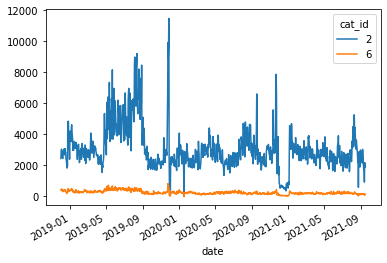

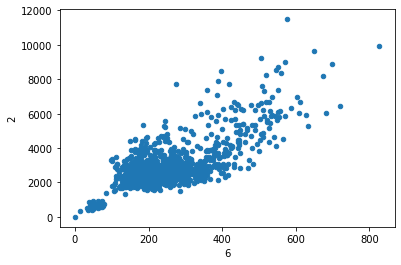

In [25]:
print(category_id_to_names_map[6])
print(category_id_to_names_map[2])
two_six = data_by_cat_id.loc[:, [2, 6]]
two_six.plot()
two_six.plot.scatter(x=6,y=2)
two_six_corr =two_six.corr()
print(two_six_corr)
two_six

Hvorfor korrelerer disse 100%?

Toalettpapir
Bærbar PC
cat_id  2      13759
cat_id              
2           1      1
13759       1      1


cat_id,2,13759
date,,
2018-12-02,2450,NaN
2018-12-03,2889,NaN
2018-12-04,3048,NaN
2018-12-05,2777,NaN
2018-12-06,2882,NaN
...,...,...
2021-09-11,1744,6
2021-09-12,924,0
2021-09-13,2179,11


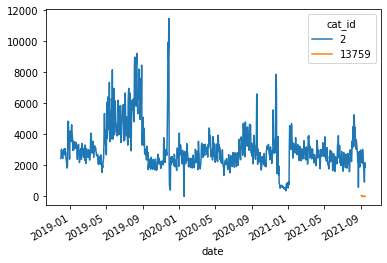

In [26]:

print(category_id_to_names_map[13759])
print(category_id_to_names_map[2])
dopapir_pc = data_by_cat_id.loc[:, [2,  13759]]
dopapir_pc.plot()
dopapir_pc_corr = dopapir_pc.corr()
print(dopapir_pc_corr)
dopapir_pc

Ser ut som dopapir og PC kun korrelerer 100 % fordi dopapir er en ny kategori

In [ ]:
print("Hello Sander")